<a href="https://colab.research.google.com/github/Aether25-ai/Stock-Price-Prediction-ML/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1419588760.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2024-01-01', end='2026-01-16')
[*********************100%***********************]  1 of 1 completed

Epoch 1/10



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0293
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0018
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0015
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0015
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0012
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 9.3772e-04
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 9.4249e-04
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0010
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 7.5036e-04
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.5694e-04
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 342ms/step


/tmp/ipython-input-1419588760.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


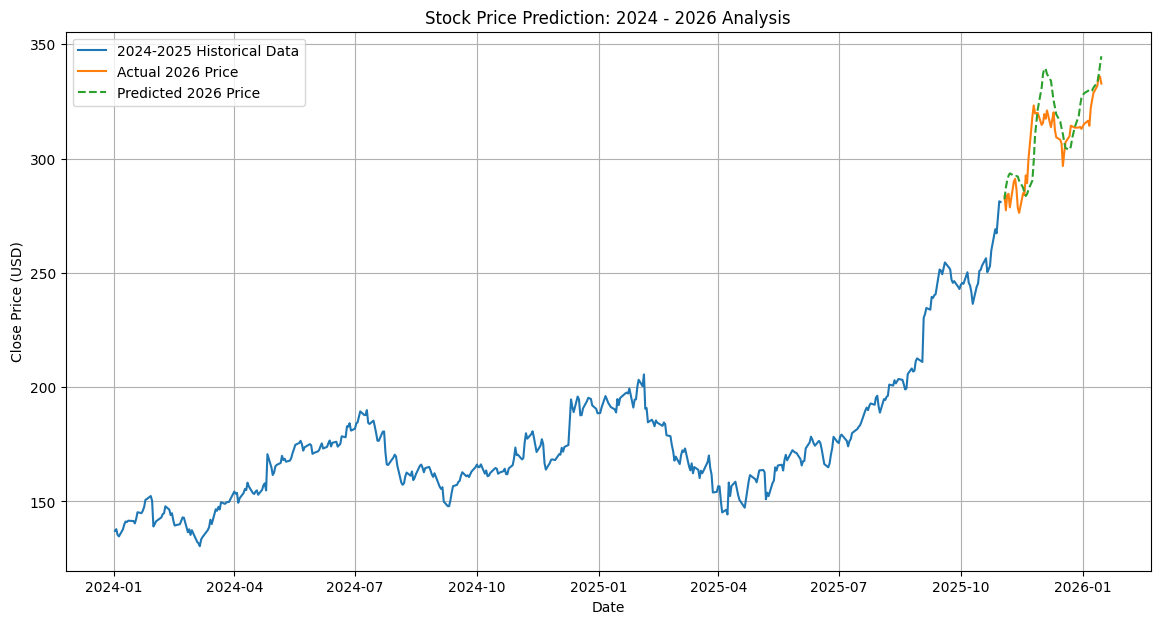

In [2]:
# ==========================================================
# PROJECT: STOCK PRICE PREDICTION USING LSTM
# ==========================================================

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# 1. Load Data (Range: 2024 to 2026)
ticker = 'GOOGL'
df = yf.download(ticker, start='2024-01-01', end='2026-01-16')

# Clean MultiIndex columns if present
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

# 2. Preprocess Data
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * .9)) # Use 90% for training

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create training sequences
train_data = scaled_data[0:int(training_data_len), :]
x_train, y_train = [], []

for i in range(30, len(train_data)): # 30-day window for faster learning
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# 3. Build the Model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(32, return_sequences=False),
    Dense(16),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=8, epochs=10)

# 4. Predictions for 2026
test_data = scaled_data[training_data_len - 30: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# 5. Visualization
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(14,7))
plt.title('Stock Price Prediction: 2024 - 2026 Analysis')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.plot(train['Close'], label='2024-2025 Historical Data')
plt.plot(valid['Close'], label='Actual 2026 Price')
plt.plot(valid['Predictions'], label='Predicted 2026 Price', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()